#### Dataset : https://www.kaggle.com/karangadiya/fifa19

Our dataset has multiple columns but we need to obtain necessary columns like poisitons and players abilities (crossing,jumping etc.) 

## Importing our modules

In [58]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Uploding datset

In [37]:
data = pd.read_csv("fifa_cleaned.csv")
print(data.info)
data.columns

<bound method DataFrame.info of            id            name                         full_name  birth_date  \
0      158023        L. Messi    Lionel Andrés Messi Cuccittini  1987-06-24   
1      190460      C. Eriksen      Christian  Dannemann Eriksen  1992-02-14   
2      195864        P. Pogba                        Paul Pogba  1993-03-15   
3      198219      L. Insigne                   Lorenzo Insigne  1991-06-04   
4      201024    K. Koulibaly                 Kalidou Koulibaly  1991-06-20   
...       ...             ...                               ...         ...   
17949  204322     R. McKenzie                    Rory  McKenzie  1993-10-07   
17950  239762       M. Sipľak                     Michal Sipľak  1996-02-02   
17951  235155      J. Bekkema                       Jan Bekkema  1996-04-09   
17952  244883      A. Al Yami               Abdulrahman Al Yami  1997-06-19   
17953  247187  Júnior Brumado  José Francisco dos Santos Júnior  1999-05-15   

       age  height_

Index(['id', 'name', 'full_name', 'birth_date', 'age', 'height_cm',
       'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'work_rate', 'body_type', 'release_clause_euro', 'club_team',
       'club_rating', 'club_position', 'club_jersey_number', 'club_join_date',
       'contract_end_year', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
  

## Drop unusual columns

In [39]:
df = data.drop(data.columns[[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,36,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91]],axis=1)
df

positions  crossing  finishing  heading_accuracy  short_passing  \
0       CF,RW,ST        86         95                70             92   
1      CAM,RM,CM        88         81                52             91   
2         CM,CAM        80         75                75             86   
3          LW,ST        86         77                56             85   
4             CB        30         22                83             68   
...          ...       ...        ...               ...            ...   
17949  RM,CAM,CM        57         61                60             66   
17950         LB        50         19                53             55   
17951         GK        11          9                13             26   
17952      ST,LM        42         60                55             49   
17953         ST        32         58                58             47   

       volleys  dribbling  freekick_accuracy  long_passing  ball_control  ...  \
0           86         97                 94            89            96  ...   
1           80         84                 87            89            91  ...   
2           85         87                 82            90            90  ...   
3           74         90                 77            78            93  ...   
4           14         69                 28            60            63  ...   
...        ...        ...                ...           ...           ...  ...   
17949       37         64                 47            61            66  ...   
17950       31         52                 28            43            53  ...   
17951        9         12                 12            24            18  ...   
17952       49         57                 39            37            56  ...   
17953       39         58                 25            37            56  ...   

       strength  long_shots  aggression  interceptions  positioning  vision  \
0            66          94          48             22           94      94   
1            58          89          46             56           84      91   
2            87          82          78             64           82      88   
3            44          84          34             26           83      87   
4            94          15          87             88           24      49   
...         ...         ...         ...            ...          ...     ...   
17949        64          54          69             41           60      64   
17950        70          22          62             55           42      39   
17951        63           9          27             10            5      25   
17952        49          58          38             15           54      52   
17953        67          53          67             20           53      49   

       penalties  composure  marking  sliding_tackle  
0             75         96       33              26  
1             67         88       59              22  
2             82         87       63              67  
3             61         83       51              22  
4             33         80       91              87  
...          ...        ...      ...             ...  
17949         63         56       40              18  
17950         32         52       53              60  
17951         16         47        9              13  
17952         50         53       16              17  
17953         52         45       23              21  

[17954 rows x 28 columns]

## Reducing positions to general

In [41]:
index = 0
for i in df.iterrows():
    arifk = i[1][0].split(',')
    if arifk[0] == 'CB' or arifk[0] == 'RB' or arifk[0] == 'RWB' or  arifk[0] == 'LB'  or arifk[0] == 'LWB':
        df.at[index,'positions'] = 'DEF'
    elif arifk[0] == 'CDM' or arifk[0] == 'CM' or arifk[0] == 'RM' or  arifk[0] == 'LM'  or arifk[0] == 'CAM':
        df.at[index,'positions'] = 'MID'
    elif arifk[0] == 'RF' or arifk[0] == 'LF' or arifk[0] == 'CF' or  arifk[0] == 'ST'  or arifk[0] == 'RW' or arifk[0] == 'LW' :
        df.at[index,'positions'] = 'ATT'
    index = index + 1
df 

positions  crossing  finishing  heading_accuracy  short_passing  \
0           ATT        86         95                70             92   
1           MID        88         81                52             91   
2           MID        80         75                75             86   
3           ATT        86         77                56             85   
4           DEF        30         22                83             68   
...         ...       ...        ...               ...            ...   
17949       MID        57         61                60             66   
17950       DEF        50         19                53             55   
17951        GK        11          9                13             26   
17952       ATT        42         60                55             49   
17953       ATT        32         58                58             47   

       volleys  dribbling  freekick_accuracy  long_passing  ball_control  ...  \
0           86         97                 94            89            96  ...   
1           80         84                 87            89            91  ...   
2           85         87                 82            90            90  ...   
3           74         90                 77            78            93  ...   
4           14         69                 28            60            63  ...   
...        ...        ...                ...           ...           ...  ...   
17949       37         64                 47            61            66  ...   
17950       31         52                 28            43            53  ...   
17951        9         12                 12            24            18  ...   
17952       49         57                 39            37            56  ...   
17953       39         58                 25            37            56  ...   

       strength  long_shots  aggression  interceptions  positioning  vision  \
0            66          94          48             22           94      94   
1            58          89          46             56           84      91   
2            87          82          78             64           82      88   
3            44          84          34             26           83      87   
4            94          15          87             88           24      49   
...         ...         ...         ...            ...          ...     ...   
17949        64          54          69             41           60      64   
17950        70          22          62             55           42      39   
17951        63           9          27             10            5      25   
17952        49          58          38             15           54      52   
17953        67          53          67             20           53      49   

       penalties  composure  marking  sliding_tackle  
0             75         96       33              26  
1             67         88       59              22  
2             82         87       63              67  
3             61         83       51              22  
4             33         80       91              87  
...          ...        ...      ...             ...  
17949         63         56       40              18  
17950         32         52       53              60  
17951         16         47        9              13  
17952         50         53       16              17  
17953         52         45       23              21  

[17954 rows x 28 columns]

## Droping goalkeepers

In [42]:
df.drop(df.loc[df['positions'] == "GK"].index,axis=0 ,inplace=True)
df.dropna()

positions  crossing  finishing  heading_accuracy  short_passing  \
0           ATT        86         95                70             92   
1           MID        88         81                52             91   
2           MID        80         75                75             86   
3           ATT        86         77                56             85   
4           DEF        30         22                83             68   
...         ...       ...        ...               ...            ...   
17948       MID        68         57                52             64   
17949       MID        57         61                60             66   
17950       DEF        50         19                53             55   
17952       ATT        42         60                55             49   
17953       ATT        32         58                58             47   

       volleys  dribbling  freekick_accuracy  long_passing  ball_control  ...  \
0           86         97                 94            89            96  ...   
1           80         84                 87            89            91  ...   
2           85         87                 82            90            90  ...   
3           74         90                 77            78            93  ...   
4           14         69                 28            60            63  ...   
...        ...        ...                ...           ...           ...  ...   
17948       57         68                 68            61            65  ...   
17949       37         64                 47            61            66  ...   
17950       31         52                 28            43            53  ...   
17952       49         57                 39            37            56  ...   
17953       39         58                 25            37            56  ...   

       strength  long_shots  aggression  interceptions  positioning  vision  \
0            66          94          48             22           94      94   
1            58          89          46             56           84      91   
2            87          82          78             64           82      88   
3            44          84          34             26           83      87   
4            94          15          87             88           24      49   
...         ...         ...         ...            ...          ...     ...   
17948        34          65          45             32           55      72   
17949        64          54          69             41           60      64   
17950        70          22          62             55           42      39   
17952        49          58          38             15           54      52   
17953        67          53          67             20           53      49   

       penalties  composure  marking  sliding_tackle  
0             75         96       33              26  
1             67         88       59              22  
2             82         87       63              67  
3             61         83       51              22  
4             33         80       91              87  
...          ...        ...      ...             ...  
17948         64         62       51              17  
17949         63         56       40              18  
17950         32         52       53              60  
17952         50         53       16              17  
17953         52         45       23              21  

[15889 rows x 28 columns]

# Visualization of data

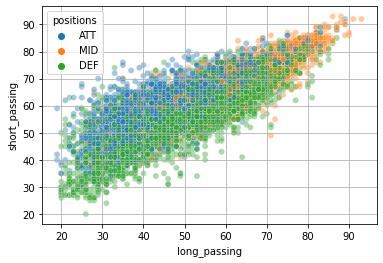

In [7]:

sns.scatterplot(data = df,x = "long_passing", y = "short_passing", hue = "positions", alpha = 0.4).grid()

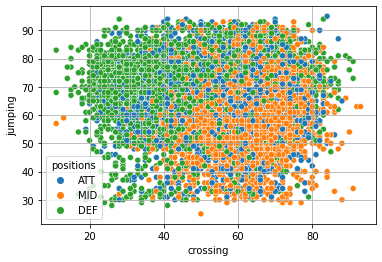

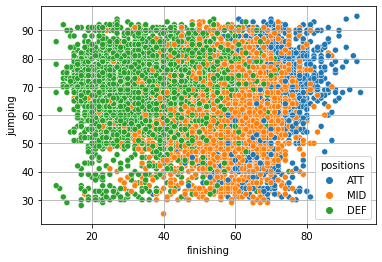

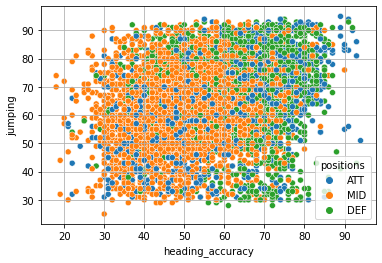

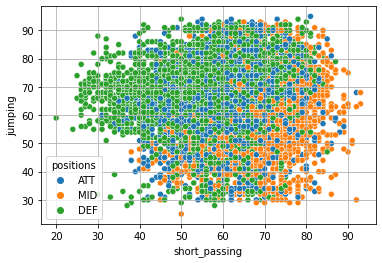

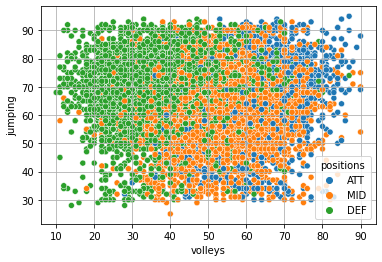

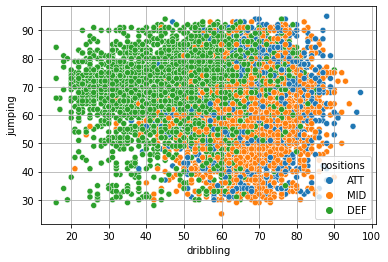

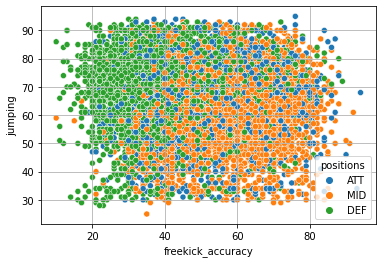

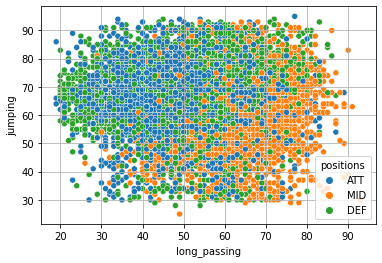

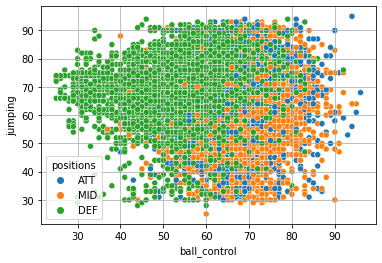

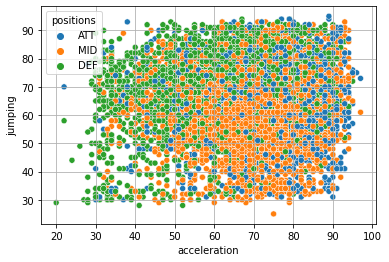

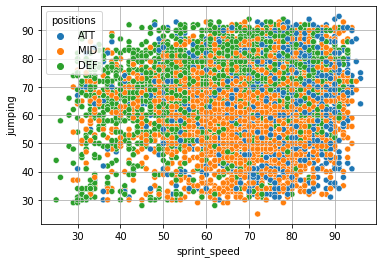

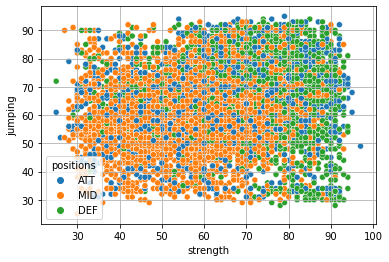

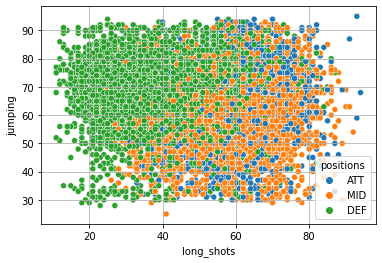

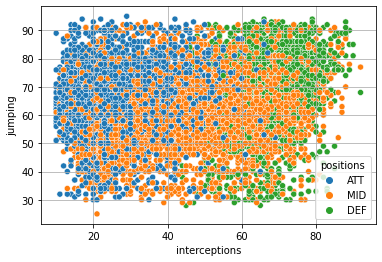

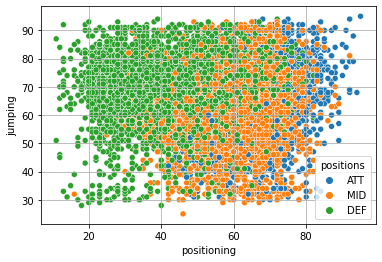

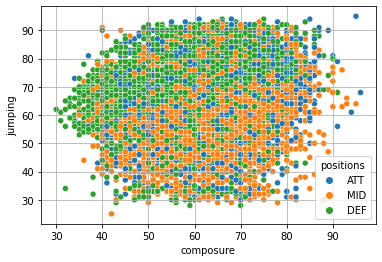

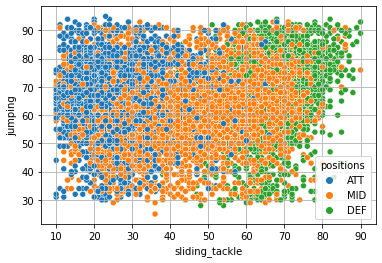

In [8]:
for column in df.columns[1:29]:
    sns.scatterplot(data = df,x = column, y = 'jumping', hue = "positions").grid()
    plt.show()

# Splitting dataframe 

In [43]:
target = df.iloc[:,0:1]  # position
features = df.iloc[:,1:] # skills
scaler = preprocessing.StandardScaler() # feature scaling
scaled_df = scaler.fit_transform(features)
features = pd.DataFrame(scaled_df,columns=features.columns)

In [44]:
features

crossing  finishing  heading_accuracy  short_passing   volleys  \
0      2.244805   2.760985          1.116078       2.987178  2.654717   
1      2.386459   1.907543         -0.437852       2.885395  2.249199   
2      1.819846   1.541782          1.547725       2.376483  2.587130   
3      2.244805   1.663703         -0.092534       2.274701  1.843680   
4     -1.721485  -1.689105          2.238360       0.544400 -2.211503   
...         ...        ...               ...            ...       ...   
15884  0.969926   0.444500         -0.437852       0.137271  0.694712   
15885  0.190834   0.688340          0.252783       0.340836 -0.657016   
15886 -0.304952  -1.871985         -0.351522      -0.778771 -1.062534   
15887 -0.871565   0.627380         -0.178864      -1.389465  0.154021   
15888 -1.579831   0.505460          0.080125      -1.593030 -0.521843   

       dribbling  freekick_accuracy  long_passing  ball_control  acceleration  \
0       2.907097           3.152888      2.648298      3.262938      1.976892   
1       1.866653           2.689512      2.648298      2.765358      0.677660   
2       2.106755           2.358529      2.728955      2.665842      0.244583   
3       2.346858           2.027547      1.761068      2.964390      2.236739   
4       0.666139          -1.216086      0.309238     -0.021094      0.157967   
...          ...                ...           ...           ...           ...   
15884   0.586105           1.431777      0.389895      0.177938      1.110738   
15885   0.265968           0.041649      0.389895      0.277454      1.283969   
15886  -0.694443          -1.216086     -1.061936     -1.016256      0.157967   
15887  -0.294271          -0.487923     -1.545879     -0.717708      1.370584   
15888  -0.214237          -1.414675     -1.545879     -0.717708     -0.101879   

       ...  strength  long_shots  aggression  interceptions  positioning  \
0      ...  0.017641    2.698092   -0.814184      -1.521346     2.664822   
1      ... -0.618496    2.381966   -0.953754       0.291681     1.983377   
2      ...  1.687500    1.939391    1.279371       0.718276     1.847088   
3      ... -1.731735    2.065841   -1.791176      -1.308048     1.915233   
4      ...  2.244120   -2.296685    1.907438       1.998059    -2.105290   
...    ...       ...         ...         ...            ...          ...   
15884  ... -2.526907    0.864566   -1.023539      -0.988102     0.007188   
15885  ... -0.141393    0.169091    0.651305      -0.508184     0.347910   
15886  ...  0.335709   -1.854110    0.162809       0.238357    -0.878690   
15887  ... -1.334150    0.421991   -1.512035      -1.894616    -0.060956   
15888  ...  0.097158    0.105866    0.511734      -1.627994    -0.129101   

         vision  penalties  composure   marking  sliding_tackle  
0      2.981532   1.830501   3.493781 -1.064649       -1.251467  
1      2.749093   1.192169   2.705861  0.443743       -1.461529  
2      2.516655   2.389042   2.607371  0.675803        0.901672  
3      2.439175   0.713419   2.213412 -0.020378       -1.461529  
4     -0.505048  -1.520746   1.917942  2.300225        1.951984  
...         ...        ...        ...       ...             ...  
15884  1.276982   0.952794   0.145122 -0.020378       -1.724107  
15885  0.657145   0.873002  -0.445818 -0.658543       -1.671591  
15886 -1.279844  -1.600537  -0.839777  0.095652        0.534063  
15887 -0.272610  -0.164289  -0.741287 -2.050905       -1.724107  
15888 -0.505048  -0.004705  -1.529207 -1.644799       -1.514045  

[15889 rows x 27 columns]

## Features Correlation Heatmap

Some columns were dropped after correlation heatmap anlyzing.

In [46]:
f, ax = plt.subplots(figsize=(25, 15))
corr = features.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=1)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features Correlation Heatmap', fontsize=10)

# Prepare target dataframe (preparing confusion matrix)

In [48]:
data = {
    'DEF' : [],
    'MID' : [],
    'ATT' : []
}
target_frame = pd.DataFrame(data)
target_frame

Empty DataFrame
Columns: [DEF, MID, ATT]
Index: []

In [49]:
confusion_target = []
for row in target.iterrows():
    if row[1][0] == 'DEF':
        list = {'DEF':1, 'MID':0, 'ATT':0}
        target_frame = target_frame.append(list, ignore_index=True)
        confusion_target.append(0)
    elif row[1][0] == 'MID':
        list = {'DEF':0, 'MID':1, 'ATT':0}
        target_frame = target_frame.append(list, ignore_index=True)
        confusion_target.append(1)
    else :
        list = {'DEF':0, 'MID':0, 'ATT':1}
        target_frame = target_frame.append(list, ignore_index=True)
        confusion_target.append(2)


# Data for train

In [50]:
 feature_train, feature_test, target_train, target_test = train_test_split(features,target_frame , test_size=0.2, random_state=42)

In [51]:
target_test

DEF  MID  ATT
10217  0.0  1.0  0.0
13687  1.0  0.0  0.0
10731  1.0  0.0  0.0
12108  0.0  1.0  0.0
5129   0.0  0.0  1.0
...    ...  ...  ...
4400   1.0  0.0  0.0
724    1.0  0.0  0.0
14021  1.0  0.0  0.0
4031   0.0  1.0  0.0
14318  0.0  1.0  0.0

[3178 rows x 3 columns]

# Train and predictions

In [52]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if(logs.get('accuracy')>0.885):
            print("\nReached 88% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallBack()

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# Passing a list of layers to the constructor
model = Sequential([
    Dense(5, activation='relu', input_shape=(27,)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(10, activation='relu'),
    Dense(15, activation='relu'),
    Dense(20, activation='relu'),
    Dense(3, activation='softmax'),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 5)                 140       
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_27 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_28 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_29 (Dense)             (None, 20)                320       
_________________________________________________________________
dense_30 (Dense)             (None, 3)                

In [54]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [55]:
history = model.fit(feature_train, target_train,
                    batch_size= 64,
                    epochs= 144,
                    validation_split= 0.2,
                    callbacks=[callbacks]
                   )

Train on 10168 samples, validate on 2543 samples
Epoch 1/144
10168/10168 [==============================] - 2s 148us/sample - loss: 0.8136 - accuracy: 0.5712 - val_loss: 0.5867 - val_accuracy: 0.7086
Epoch 2/144
10168/10168 [==============================] - 1s 71us/sample - loss: 0.4969 - accuracy: 0.7714 - val_loss: 0.4454 - val_accuracy: 0.8065
Epoch 3/144
10168/10168 [==============================] - 1s 79us/sample - loss: 0.4085 - accuracy: 0.8190 - val_loss: 0.3904 - val_accuracy: 0.8344
Epoch 4/144
10168/10168 [==============================] - 1s 76us/sample - loss: 0.3669 - accuracy: 0.8430 - val_loss: 0.3654 - val_accuracy: 0.8490
Epoch 5/144
10168/10168 [==============================] - 1s 75us/sample - loss: 0.3441 - accuracy: 0.8567 - val_loss: 0.3515 - val_accuracy: 0.8561
Epoch 6/144
10168/10168 [==============================] - 1s 75us/sample - loss: 0.3328 - accuracy: 0.8611 - val_loss: 0.3462 - val_accuracy: 0.8557
Epoch 7/144
10168/10168 [=========================

In [57]:
results = model.evaluate(feature_test, target_test)

3178/3178 [==============================] - 0s 85us/sample - loss: 0.2727 - accuracy: 0.8892


In [59]:
confusion_target = []
for row in target_test.iterrows():
    if row[1][0] == 1.0:
        confusion_target.append(0)
    elif row[1][1] == 1.0:
        confusion_target.append(1)
    else :
        confusion_target.append(2)

## Confusion Matrix
  
As we can see, model distinguish the deffenders and attackers. The model sometimes be confused because of midfield players.

In [60]:
ynew = model.predict_classes(feature_test)
pd.DataFrame(target_test).to_numpy()
#matrix = confusion_matrix(confusion_target.argmax(axis=1), ynew.argmax(axis=1))
con_mat = tf.math.confusion_matrix(labels=confusion_target, predictions=ynew).numpy()
con_mat


array([[1140,   69,    0],
       [  87, 1195,   72],
       [   6,  118,  491]])